In [187]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


In [188]:
diabetes_dataset = pd.read_csv("diabetes_dataset.csv")

In [189]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [190]:
diabetes_dataset.shape

(768, 9)

In [191]:
diabetes_dataset.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [192]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [193]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [194]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [195]:
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,stratify = Y, random_state = 2)
print(X.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [196]:
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators = 100, random_state = 42),
    'GradientBoosting' : GradientBoostingClassifier(n_estimators = 100, random_state = 42),
    'KNeighbors' : KNeighborsClassifier(n_neighbors = 5),
    'MultinomialNB' : MultinomialNB(),
    'LogisticRegression' : LogisticRegression(max_iter=100)
}

for model_name, model in models.items():
    model.fit(x_train,y_train)
    accuracy = accuracy_score(y_test,model.predict(x_test))
    print("Test accuracy: ",accuracy)
    cmat = confusion_matrix(y_test,model.predict(x_test))

Test accuracy:  0.7727272727272727
Test accuracy:  0.7532467532467533
Test accuracy:  0.7012987012987013
Test accuracy:  0.7272727272727273
Test accuracy:  0.6558441558441559
Test accuracy:  0.7532467532467533


c:\Users\Suchana Hazra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
model = SVC(kernel='linear')
model.fit(x_train,y_train)
#check training accuracy
x_train_prediction = model.predict(x_train)
score = accuracy_score(x_train_prediction,y_train)
print('Training accuracy is: ',score)

Training accuracy is:  0.7833876221498371


In [198]:
x_test_prediction = model.predict(x_test)
score = accuracy_score(x_test_prediction,y_test)
print('Test accuracy is: ',score)

Test accuracy is:  0.7727272727272727


In [199]:
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



<Axes: >

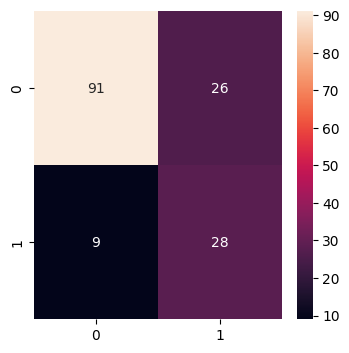

In [200]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(4,4))
plt.xlabel('Actual')
plt.ylabel('Predicted')
cmat = confusion_matrix(x_test_prediction,y_test)
sb.heatmap(cmat,annot=True)

In [201]:
for column in X.columns:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [202]:
#save the trained model
import pickle

pickle.dump(classifier, open('diabetes_detection_model.pkl','wb'))